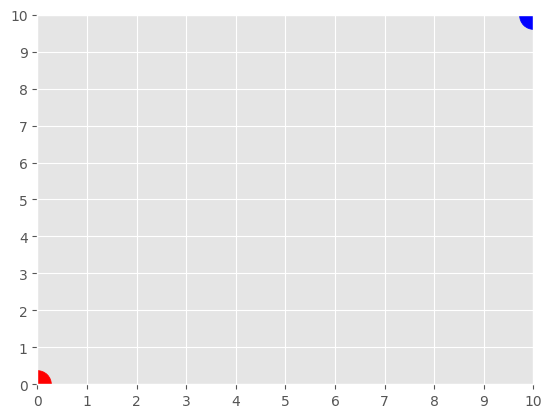

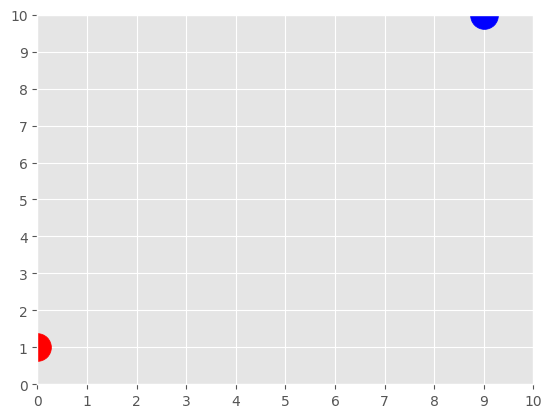

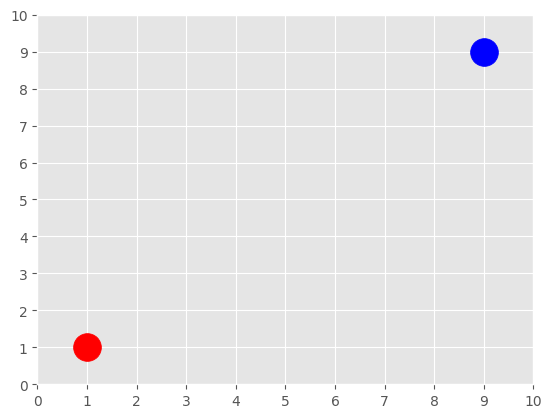

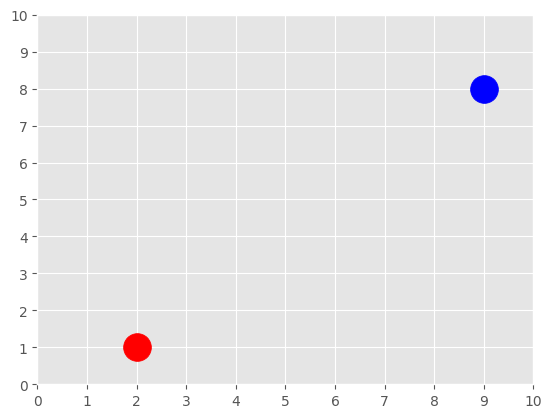

Invalid command


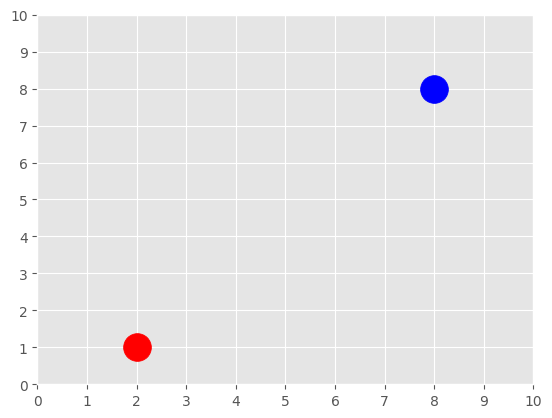

Invalid command


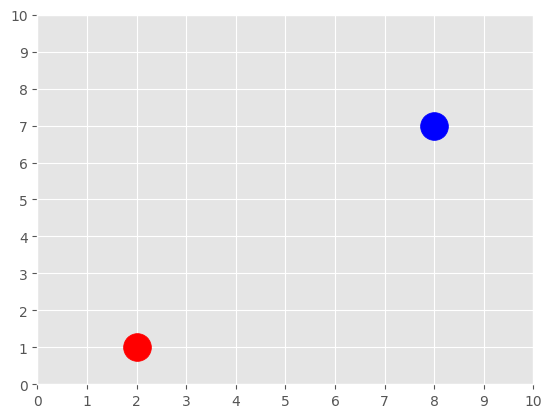

Invalid command


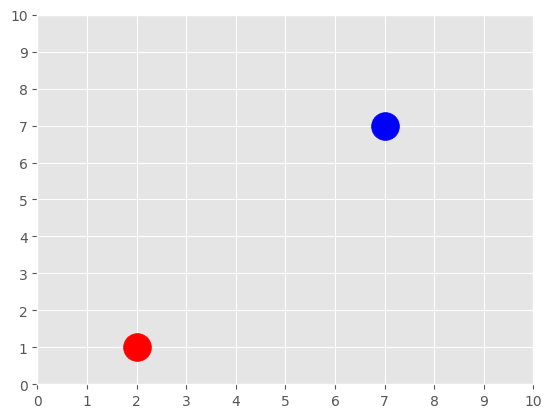

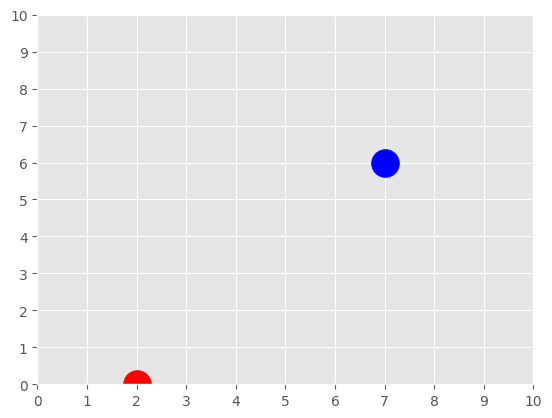

OUT OF AREA!
GAME OVER


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 초기 데이터
df_dict = dict()
df_dict['player'] = [0, 0]
df_dict['com'] = [10, 10]

# 0행이 x좌표, 1행이 y좌표
df = pd.DataFrame(df_dict)

# 플레이어 명령어 처리 함수
def command(cmd, df):
    if cmd == 'U':
        df.loc[1, 'player'] += 1
    elif cmd == 'D':
        df.loc[1, 'player'] -= 1
    elif cmd == 'L':
        df.loc[0, 'player'] -= 1
    elif cmd == 'R':
        df.loc[0, 'player'] += 1
    else:
        print('Invalid command')

# 컴퓨터 이동 함수
def move_com(df):
    player_x, player_y = df['player']
    com_x, com_y = df['com']

    dx, dy = player_x - com_x, player_y - com_y
    if abs(dx) >= abs(dy):
        df.loc[0, 'com'] += np.sign(dx)
    else:
        df.loc[1, 'com'] += np.sign(dy)

# 화면 업데이트 함수
def update_plot(df):
    plt.style.use('ggplot')  # 그래프 스타일을 'ggplot'으로 설정
    plt.grid(True)  # 격자 활성화
    plt.xlim([0, 10])  # x축 범위 설정
    plt.ylim([0, 10])  # y축 범위 설정
    plt.xticks(range(0, 11))  # x축 눈금 설정
    plt.yticks(range(0, 11))  # y축 눈금 설정

    # 사용자와 CPU의 위치를 별도로 표시
    plt.scatter(df.loc[0, 'player'], df.loc[1, 'player'], s = 400, color = 'red')  # 사용자 위치
    plt.scatter(df.loc[0, 'com'], df.loc[1, 'com'], s = 400, color = 'blue')  # CPU 위치
    plt.show() # 플롯을 화면에 출력

# 플롯 초기 설정 및 생성
update_plot(df)
plt.pause(1)  # 딜레이 추가

# 게임 루프
while df['player'][0] != df['com'][0] or df['player'][1] != df['com'][1]:
    cmd = input().strip().upper()
    command(cmd, df)

    # 경기장 범위 체크
    if df['player'][0] < 0 or df['player'][0] > 10 or df['player'][1] < 0 or df['player'][1] > 10:
        print('OUT OF AREA!')
        break

    move_com(df)  # 컴퓨터 이동

    # 플롯 업데이트
    update_plot(df)
    plt.pause(0.5)  # 딜레이

print('GAME OVER')